In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [577]:
def describe(df, df_name):
    df['dup_acct'] = df.duplicated(['acct_id'])
    df_num_dup_rec=df['dup_acct'].sum()
    dup_df=df[df['dup_acct']==True]
    df_num_dup_acct=dup_df['acct_id'].nunique()
    print('Number of duplicate records in {} dataset: {}' .format(df_name, df_num_dup_rec))
    print('Number of duplicate accounts in {} dataset: {}' .format(df_name, df_num_dup_acct))
    
    #Missing data
    miss=df.isnull().sum()
    print('Number of missing {} in {} dataset: {}' .format(pd.DataFrame(df.isnull().sum()).index[0], df_name, miss[0]))
    print('Number of missing {}s in {} dataset: {}' .format(pd.DataFrame(df.isnull().sum()).index[1], df_name, miss[1]))
    
    if df_name=='FICO' or df_name=='fico':
        #Identify missing records with a "Missing" tag and non-numeric FICO values with an "Error" tag
        df['FICO']=pd.to_numeric(df['FICO'], errors='ignore').fillna(0)
        df['FICO']=pd.to_numeric(df['FICO'], errors='coerce').fillna("Error")
        df['FICO']=df['FICO'].replace({0: 'Missing'})
        
        print('Number of records with erroneous FICO score {}' .format(len(df[df['FICO']=='Error'])))
        
def freqtable(df):
    s = df.groupby(['seg'])['acct_id'].size()
    N = s.reset_index()['acct_id'].sum()
    s_len = s / N
    freqtable = pd.concat([s, s_len], axis=1).set_axis(['n', 'pct'], axis=1, inplace=False).reset_index()
    print(freqtable)
    return freqtable

def plotfico(red):
    plt.style.use('ggplot')
    categories =pd.Series(pd.Categorical(res['seg'].cat.categories))
    #categories=categories.cat.rename_categories(['(0, 749]','(749, 804]','(804,839]','(839, 850]','Missing'])
    ind = np.array([x for x, _ in enumerate(categories)])
    width = 0.35       
    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('FICO Segments')
    ax1.set_ylabel('Frequency', color=color)
    ax1.bar(ind, res.iloc[:,1], width, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    plt.xticks(ind + width / 2, categories)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Percent', color=color)  # we already handled the x-label with ax1
    ax2.bar(ind, res.iloc[:,2], width, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [578]:
fico=pd.read_csv('B30_written_test_fico.csv')
region=pd.read_csv('B30_written_test_region.csv')

In [579]:
#sort fico and region datasets by acct_id
fico=fico.sort_values(by='acct_id', ascending=True)

In [580]:
describe(fico.copy(),'FICO')

Number of duplicate records in FICO dataset: 13
Number of duplicate accounts in FICO dataset: 13
Number of missing acct_id in FICO dataset: 0
Number of missing FICOs in FICO dataset: 29615
Number of records with erroneous FICO score 2


In [581]:
describe(region.copy(),'REGION')

Number of duplicate records in REGION dataset: 173
Number of duplicate accounts in REGION dataset: 124
Number of missing acct_id in REGION dataset: 0
Number of missing regions in REGION dataset: 0


In [582]:
#Get descriptive statistics based on FICO dataset which excludes missing and errors
#Remove missing and errors
fico_nomiss=fico.copy()
fico_nomiss['FICO']=pd.to_numeric(fico_nomiss['FICO'], errors='ignore').fillna(0)
fico_nomiss['FICO']=pd.to_numeric(fico_nomiss['FICO'], errors='coerce').fillna("Error")
fico_nomiss['FICO']=fico_nomiss['FICO'].replace({0: 'Missing'})

fico_nomiss = fico_nomiss[fico_nomiss.FICO != 'Missing']
fico_nomiss = fico_nomiss[fico_nomiss.FICO != 'Error']

#remove duplicates
fico_nomiss_nodups=fico_nomiss.drop_duplicates()
fico_nomiss_nodups['FICO']=pd.to_numeric(fico_nomiss_nodups['FICO'], errors='coerce')
fico_nomiss_nodups.describe(include='all')

C:\Program Files\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,acct_id,FICO
count,70386.000000,70386.000000
mean,50280.373966,785.747066
std,27740.592764,64.603625
min,1.000000,420.000000
25%,26143.250000,749.000000
50%,49720.500000,804.000000
75%,73245.750000,839.000000
max,99992.000000,850.000000


In [583]:
#Create 5 FICO score segments
#Get frequency and percentage of customers in each segment

fico1=fico.copy()
fico1['FICO']=pd.to_numeric(fico1['FICO'], errors='ignore').fillna(999)

fico1 = fico1[fico1.FICO != 'AA']
fico1 = fico1[fico1.FICO != 'SSS']

fico1=fico1.drop_duplicates()

fico1['FICO']=pd.to_numeric(fico1['FICO'], errors='coerce').astype(np.float64)
fico1.describe()

,acct_id,FICO
count,99998.000000,99998.000000
mean,50000.498680,848.896788
std,28867.082764,111.430549
min,1.000000,420.000000
25%,25001.250000,775.000000
50%,50000.500000,835.000000
75%,74999.750000,999.000000
max,100000.000000,999.000000


In [584]:
bins=[0,600,700,800,850,999] 
fico1['seg']=pd.cut(fico1['FICO'], bins)

In [585]:
freqtable(fico1)

          seg      n       pct
0    (0, 600]   1063  0.010630
1  (600, 700]   6888  0.068881
2  (700, 800]  25852  0.258525
3  (800, 850]  36583  0.365837
4  (850, 999]  29612  0.296126


,seg,n,pct
0,"(0, 600]",1063,0.010630
1,"(600, 700]",6888,0.068881
2,"(700, 800]",25852,0.258525
3,"(800, 850]",36583,0.365837
4,"(850, 999]",29612,0.296126


In [586]:
fico1=fico.copy()
fico1['FICO']=pd.to_numeric(fico1['FICO'], errors='ignore').fillna("Missing")

fico1 = fico1[fico1.FICO != 'Missing']
fico1 = fico1[fico1.FICO != 'AA']
fico1 = fico1[fico1.FICO != 'SSS']

fico1=fico1.drop_duplicates()

fico1['FICO']=pd.to_numeric(fico1['FICO'], errors='coerce').astype(np.float64)
fico1.describe()

,acct_id,FICO
count,70386.000000,70386.000000
mean,50280.373966,785.747066
std,27740.592764,64.603625
min,1.000000,420.000000
25%,26143.250000,749.000000
50%,49720.500000,804.000000
75%,73245.750000,839.000000
max,99992.000000,850.000000


In [587]:
bins=[0,600,700,800,850] 
fico1['seg']=pd.cut(fico1['FICO'], bins)

In [588]:
res=freqtable(fico1)

          seg      n       pct
0    (0, 600]   1063  0.015102
1  (600, 700]   6888  0.097860
2  (700, 800]  25852  0.367289
3  (800, 850]  36583  0.519748


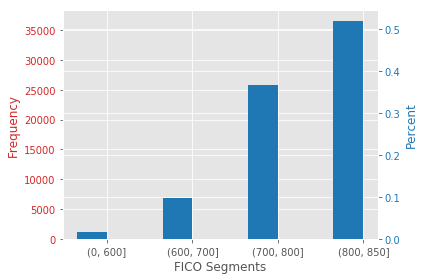

In [589]:
plotfico(res)

In [590]:
#The above result probably does not reflect a true population distribuion along these segments. I would have expected that
#there are relatively fewer customers in the higher FICO buckets

In [591]:
#Prepare region dataset
region=region.sort_values(by='acct_id', ascending=True)
region=region.drop_duplicates()

In [600]:
#Merge region data to FICO
df=fico1.copy().drop(['seg'],axis=1)
df1=pd.merge(df, region, on='acct_id', how='inner')
df1.head(n=10)

,acct_id,FICO,region
0,1,768.0,New York
1,2,850.0,Dallas
2,3,677.0,Los Angeles
3,4,843.0,Chicago
4,5,796.0,Philadelphia
5,6,669.0,New York
6,7,805.0,San Antonio
7,8,850.0,San Antonio
8,9,838.0,Houston
9,10,850.0,Philadelphia


In [601]:
g=df1[['region','FICO']].groupby(['region']).mean().reset_index()
g.sort_values(by=('FICO'),ascending=False).iloc[[0, -1]]

,region,FICO
7,Phoenix,788.170231
2,Dallas,782.102021


In [606]:
us_pop=350000000
pct_people_buy_tshirt=0.5
perc_green_tshirt=0.1
avg_num_tshirt_person_1yr=5
economy=1.0

green_tshirts_sold=us_pop*pct_people_buy_tshirt*perc_green_tshirt*avg_num_tshirt_person_1yr

print('{}M t-shirts sold' .format(green_tshirts_sold/1000000))

87.5M t-shirts sold
